__authors__: Chiara Menchetti, Davide Di Virgilio, Carlo Volpe, Bruno Limon

___

## Topic Modeling

In [4]:
#libraries
import random
import numpy as np
import matplotlib as plt
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import plotly.express as px

## Topic Modeling on real news dataset

In [5]:
#loading real news dataset
df=pd.read_csv("df_without_duplicates.csv")
df_real=df[df["fake"]==0]
df_real

,content,fake
0,what we can learn from the resurgence of covid...,0
1,why approving a covid 19 vaccine too early cou...,0
2,not sure you have covid 19 here are the sympto...,0
3,flu study highlights difficulty of achieving c...,0
4,resign or return the dilemma facing classroom ...,0
...,...,...
65207,and there is this gov wolf is not allowing co...,0
65208,abbott said almost 75 percent of the deaths fr...,0
65209,texas gov greg abbott said almost 75 percent o...,0
65210,facebook post says researchers found a fabric ...,0


In [7]:
#text cleaning
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

from sklearn.feature_extraction.text import CountVectorizer
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

en_stopwords = stopwords.words('english') 
stopwords_1=["coronavirus", "covid19","covid",'u','19','de'] + list(en_stopwords)

# vectorization
tf_vectorizer = CountVectorizer(stop_words=stopwords_1, max_df=0.5, min_df=5,max_features = 7000, ngram_range=(1,2))

# Learn the vocabulary dictionary and return document-term matrix.
tf = tf_vectorizer.fit_transform(df_real["content"].values)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Enrico\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
from sklearn.decomposition import LatentDirichletAllocation

n_components = 4

lda = LatentDirichletAllocation(n_components=n_components, max_iter=20,
                                learning_method = 'batch',
                                n_jobs=-1,verbose=1)
lda.fit(tf)


iteration: 1 of max_iter: 20
iteration: 2 of max_iter: 20
iteration: 3 of max_iter: 20
iteration: 4 of max_iter: 20
iteration: 5 of max_iter: 20
iteration: 6 of max_iter: 20
iteration: 7 of max_iter: 20
iteration: 8 of max_iter: 20
iteration: 9 of max_iter: 20
iteration: 10 of max_iter: 20
iteration: 11 of max_iter: 20
iteration: 12 of max_iter: 20
iteration: 13 of max_iter: 20
iteration: 14 of max_iter: 20
iteration: 15 of max_iter: 20
iteration: 16 of max_iter: 20
iteration: 17 of max_iter: 20
iteration: 18 of max_iter: 20
iteration: 19 of max_iter: 20
iteration: 20 of max_iter: 20


LatentDirichletAllocation(max_iter=20, n_components=4, n_jobs=-1, verbose=1)

In [9]:
#function for printing n_top_words
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print()
        message = f'Topic {topic_idx}: '
        message += ', '.join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

In [10]:
#printing real news topics
n_top_words = 20
tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda, tf_feature_names, n_top_words)


Topic 0: guidance, information, cdc, new, resources, disease, use, media, via, study, vaccine, nih, amp, social, news, 2019, clinical, read, social media, toolkit

Topic 1: testing, cases, health, test, new, contact, deaths, symptoms, infection, tracing, virus, tests, contact tracing, positive, states, news, laboratory, spread, state, county

Topic 2: people, home, get, like, know, go, sick, one, need, amp, face, would, masks, stay, time, safe, protect, mask, help, spread

Topic 3: amp, support, health, resources, people, community, healthcare, care, help, experiencing, homelessness, workers, services, children, professionals, experiencing homelessness, pandemic, need, stigma, us



## Visualization Phase

In [15]:
import pyLDAvis
import pyLDAvis.sklearn

In [16]:
pyLDAvis.enable_notebook()

c:\Users\Enrico\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [17]:
pyLDAvis.sklearn.prepare(lda,tf,tf_vectorizer)

c:\Users\Enrico\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.224764 -0.043661       1        1  31.853941
3      0.072046  0.114831       2        1  28.143839
1     -0.125094 -0.229087       3        1  22.525847
0     -0.171716  0.157918       4        1  17.476373, topic_info=               Term         Freq        Total Category  logprob  loglift
6221        testing  4744.000000  4744.000000  Default  30.0000  30.0000
944           cases  3945.000000  3945.000000  Default  29.0000  29.0000
6047        support  3506.000000  3506.000000  Default  28.0000  28.0000
2748       guidance  2627.000000  2627.000000  Default  27.0000  27.0000
6208           test  2540.000000  2540.000000  Default  26.0000  26.0000
...             ...          ...          ...      ...      ...      ...
4157           news   787.333992  2009.487897   Topic4  -5.4586   0.8073
391             amp   852.517781  7725.811173   Topic4  -5.3791  -0.4598
1220  communication   652.057133  1578.877917   Topic4  -5.6472   0.8600
3389            key   613.511015  1230.749934   Topic4  -5.7081   1.0481
2886           help   651.083922  4313.473938   Topic4  -5.6486  -0.1465

[262 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
3         2  0.054592    000
3         3  0.945675    000
63        3  0.244606   2019
63        4  0.755172   2019
70        2  0.276938   2020
...     ...       ...    ...
6941      1  0.837912  would
6941      2  0.015157  would
6941      3  0.144941  would
6941      4  0.001895  would
6988      2  0.999125  youth

[412 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 4, 2, 1])

c:\Users\Enrico\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


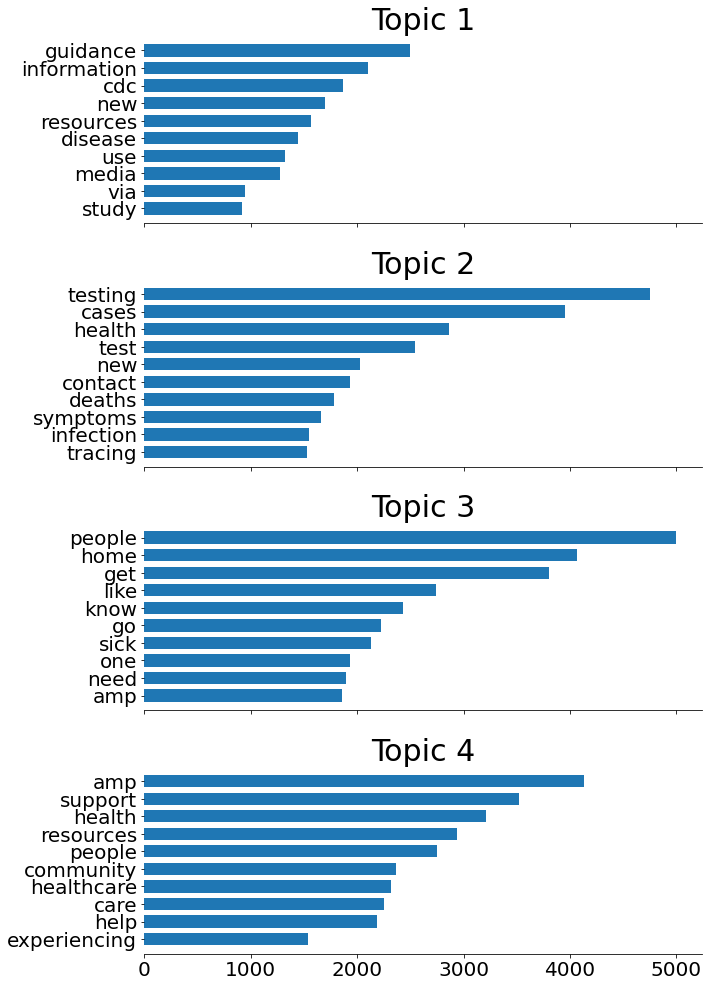

In [18]:
# Plot topics function
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(4,1, figsize=(10, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)
    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()
    
# Show topics
n_top_words = 10
#feature_names = vectorizer_cv.get_feature_names_out()
plot_top_words(lda, tf_feature_names, n_top_words, '')

## Topic Modeling on fake news dataset

In [37]:
#loading fake news dataset
df=pd.read_csv("df_without_duplicates.csv")
df_fake=df[df["fake"]==1]
df_fake

c:\Users\Enrico\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,content,fake
3315,the u s cdc quietly updated their numbers in a...,1
3316,social media posts shared thousands of times a...,1
3317,the cdc updated the covid 19 number to admit t...,1
3318,either masks work or they don t if masks work ...,1
3319,the rt pcr test for the virus that causes covi...,1
...,...,...
66676,if you thought children couldn t get coronavir...,1
66677,a state lawmaker says children don t seem to b...,1
66678,same shady characters involved with trump camp...,1
66679,jerome corsi says dr anthony fauci s name appe...,1


In [38]:
#Libraries
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

from sklearn.feature_extraction.text import CountVectorizer
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

en_stopwords = stopwords.words('english') 
stopwords_1=["coronavirus", "covid19","covid",'u','19','de'] + list(en_stopwords)

tf_vectorizer = CountVectorizer(stop_words=stopwords_1, max_df=0.5, min_df=5,max_features = 7000, ngram_range=(1,2))
tf_fake = tf_vectorizer.fit_transform(df_fake["content"].values)


c:\Users\Enrico\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Enrico\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [43]:
from sklearn.decomposition import LatentDirichletAllocation

n_components_fake = 3

lda_fake = LatentDirichletAllocation(n_components=n_components, max_iter=20,
                                learning_method = 'batch',
                                n_jobs=-1,verbose=1)
lda_fake.fit(tf_fake)


c:\Users\Enrico\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


iteration: 1 of max_iter: 20
iteration: 2 of max_iter: 20
iteration: 3 of max_iter: 20
iteration: 4 of max_iter: 20
iteration: 5 of max_iter: 20
iteration: 6 of max_iter: 20
iteration: 7 of max_iter: 20
iteration: 8 of max_iter: 20
iteration: 9 of max_iter: 20
iteration: 10 of max_iter: 20
iteration: 11 of max_iter: 20
iteration: 12 of max_iter: 20
iteration: 13 of max_iter: 20
iteration: 14 of max_iter: 20
iteration: 15 of max_iter: 20
iteration: 16 of max_iter: 20
iteration: 17 of max_iter: 20
iteration: 18 of max_iter: 20
iteration: 19 of max_iter: 20
iteration: 20 of max_iter: 20


LatentDirichletAllocation(max_iter=20, n_components=3, n_jobs=-1, verbose=1)

In [44]:
n_top_words = 20
tf_feature_names_fake = tf_vectorizer.get_feature_names()
print_top_words(lda_fake, tf_feature_names_fake, n_top_words)


Topic 0: hoax, trump, street, testing, cases, right, said, us, stopped, michigan, people, vitamin, china, main, government, right cases, stopped testing, testing right, governor, zero

Topic 1: says, bill, vaccine, gates, tests, via, million, positive, deaths, trump, people, queen, bill gates, flu, elizabeth, queen elizabeth, tests positive, cdc, palace, elizabeth tests

Topic 2: made, health, lab, essential, ban, non, two, belgium, minister, non essential, health minister, sexual, test, essential sexual, activities, sexual activities, ban non, belgium health, areas, greater



c:\Users\Enrico\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Visualization Phase

In [45]:
pyLDAvis.enable_notebook()

c:\Users\Enrico\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [46]:
pyLDAvis.sklearn.prepare(lda_fake,tf_fake,tf_vectorizer)

c:\Users\Enrico\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.152468  0.217733       1        1  40.093027
1     -0.137505 -0.225354       2        1  32.473148
2      0.289973  0.007621       3        1  27.433825, topic_info=                 Term        Freq       Total Category  logprob  loglift
699              hoax  296.000000  296.000000  Default  30.0000  30.0000
1507            trump  330.000000  330.000000  Default  29.0000  29.0000
868              made  124.000000  124.000000  Default  28.0000  28.0000
181              bill  114.000000  114.000000  Default  27.0000  27.0000
1547          vaccine  106.000000  106.000000  Default  26.0000  26.0000
...               ...         ...         ...      ...      ...      ...
1504  triggers debate   68.576858   69.212390   Topic3  -4.8460   1.2842
868              made  113.503353  124.769653   Topic3  -4.3421   1.1988
804               lab   94.304982  112.248650   Topic3  -4.5274   1.1192
676            health  101.977977  173.635469   Topic3  -4.4492   0.7612
1453             test   79.436507  103.367529   Topic3  -4.6990   1.0301

[149 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
15        2  0.977761           17
44        2  0.981171           5g
48        2  0.969838           65
49        2  0.969838   65 million
61        3  0.990122   activities
...     ...       ...          ...
1578      1  0.992404      vitamin
1587      1  0.995102         wall
1588      1  0.994080  wall street
1625      1  0.985924      whitmer
1662      1  0.989681         zero

[153 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3])

c:\Users\Enrico\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


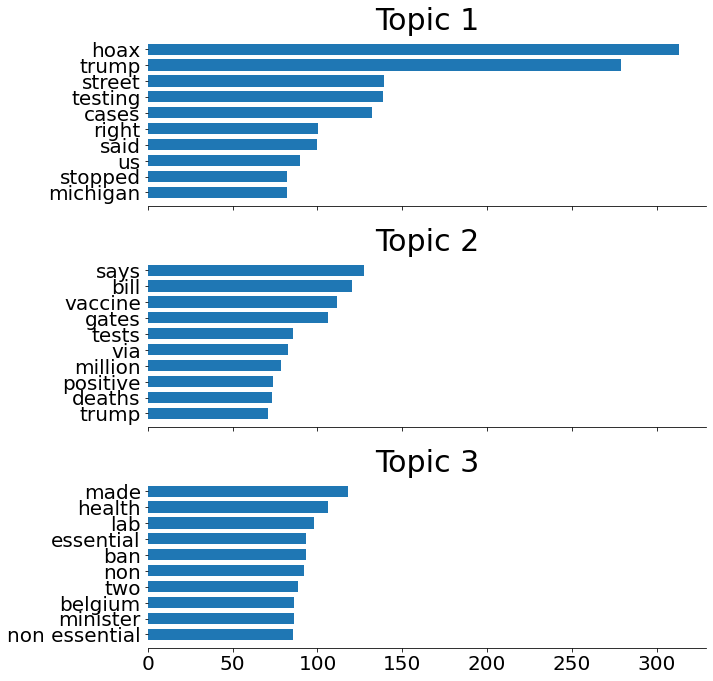

In [48]:

# Plot topics function 
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(3,1, figsize=(10, 10), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)
    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()
    
# Show topics
n_top_words = 10
#feature_names = vectorizer_cv.get_feature_names_out()
plot_top_words(lda_fake, tf_feature_names_fake, n_top_words, '')